<a href="https://colab.research.google.com/github/cecilylynn/data-science-projects/blob/main/CS_Mortality_Group_Project_(education).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title (Hidden) Diagnostic Check
##importing stuff, idk I copied this from a different workshop


import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import seaborn as sns


print(f"python: {sys.version}")
print(f"pandas: {np.__version__}")
print(f"tensorflow: {tf.__version__}")
# Detect if a GPU is present
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  print(f"GPU Enabled: True")
else:
  print(f"GPU Enabled: False")

try:
  from google.colab import drive
  is_google_colab = True

  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


python: 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
pandas: 1.19.5
tensorflow: 2.7.0
GPU Enabled: False
Notebook is on Google CoLab


In [ ]:
#bfore doing this one, you have to put the data file in the folder on the side

mortality2015 = pd.read_csv('2015_data.csv') #read in the data


FileNotFoundError: ignored

In [ ]:
mortality2015.head(5) #look at first five rows

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,age_recode_12,infant_age_recode_22,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,entity_condition_4,entity_condition_5,entity_condition_6,entity_condition_7,entity_condition_8,entity_condition_9,entity_condition_10,entity_condition_11,entity_condition_12,entity_condition_13,entity_condition_14,entity_condition_15,entity_condition_16,entity_condition_17,entity_condition_18,entity_condition_19,entity_condition_20,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,record_condition_4,record_condition_5,record_condition_6,record_condition_7,record_condition_8,record_condition_9,record_condition_10,record_condition_11,record_condition_12,record_condition_13,record_condition_14,record_condition_15,record_condition_16,record_condition_17,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,22,10,NaN,1,M,1,2015,U,7.0,B,N,NaN,NaN,I500,230,67,NaN,22,2,11I500,61L031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,I500,L031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,20,9,NaN,1,M,2,2015,U,7.0,C,N,NaN,NaN,C349,93,27,NaN,8,8,11I469,21R042,31C349,41J189,42J90,61J449,62I251,63F179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,C349,F179,I251,I469,J440,J90,R042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,24,11,NaN,4,W,6,2015,U,7.0,C,N,NaN,NaN,G309,189,52,NaN,17,1,11G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,G309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,14,6,NaN,4,S,5,2015,N,3.0,B,Y,9.0,9.0,X91,434,129,NaN,41,6,11T71,12X91,21T71,61T149,62S223,63S299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,X91,S223,S299,T149,T71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,23,11,NaN,6,W,5,2015,U,7.0,C,N,NaN,9.0,I250,214,62,NaN,21,3,11I250,21S720,61X590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,I250,S720,X590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


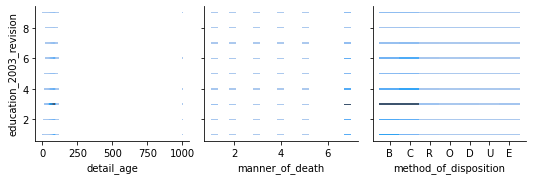

In [ ]:
#Looking at histogramps of education vs. age, manner of death, and method of dispositon

sns.pairplot(mortality2015, kind="hist", x_vars=["detail_age", "manner_of_death", "method_of_disposition"],
    y_vars=["education_2003_revision"])

In [ ]:
#cleaning up my data!

#selecting the columns I want to look at
edumort=mortality2015.loc[:,['education_2003_revision', 'detail_age', 'manner_of_death', 'method_of_disposition']]

#getting rid of unknown education
edumort=edumort[edumort['education_2003_revision']!=9]

#limiting age to adults less than 120
edumort=edumort[edumort['detail_age']<120]
edumort=edumort[edumort['detail_age']>18]


#getting rid of unspecified manner of death
edumort=edumort[edumort['manner_of_death']!=8]

#getting rid of all methods of dispostion besides cremation, burial, and donation
edumort=edumort[edumort['method_of_disposition']!='E']
edumort=edumort[edumort['method_of_disposition']!='U']
edumort=edumort[edumort['method_of_disposition']!='R']
edumort=edumort[edumort['method_of_disposition']!='O']

In [ ]:
#getting some info about my new data set
edumort.describe()

,education_2003_revision,detail_age,manner_of_death
count,2.374674e+06,2.374674e+06,2.015638e+06
mean,3.498213e+00,7.408787e+01,6.500159e+00
std,1.642021e+00,1.642976e+01,1.597206e+00
min,1.000000e+00,1.900000e+01,1.000000e+00
25%,3.000000e+00,6.400000e+01,7.000000e+00
50%,3.000000e+00,7.700000e+01,7.000000e+00
75%,4.000000e+00,8.700000e+01,7.000000e+00
max,8.000000e+00,1.160000e+02,7.000000e+00


In [ ]:
#looking at first ten rows
edumort.head(10)

,education_2003_revision,detail_age,manner_of_death,method_of_disposition
0,3.0,84,7.0,B
1,6.0,70,7.0,C
2,3.0,91,7.0,C
3,3.0,40,3.0,B
4,5.0,89,7.0,C
5,6.0,78,7.0,C
7,3.0,82,7.0,C
8,3.0,89,7.0,B
10,6.0,84,7.0,B
11,3.0,84,7.0,C


In [ ]:
#taking a random sample of 10000 from my data set
e_s=edumort.sample(10000)

In [ ]:
#looking at info about the sample
import matplotlib.pyplot as plt
e_s.describe()

,education_2003_revision,detail_age,manner_of_death
count,10000.00000,10000.000000,8426.000000
mean,3.49990,74.404900,6.498576
std,1.62532,16.139622,1.609190
min,1.00000,19.000000,1.000000
25%,3.00000,65.000000,7.000000
50%,3.00000,77.000000,7.000000
75%,4.00000,87.000000,7.000000
max,8.00000,109.000000,7.000000


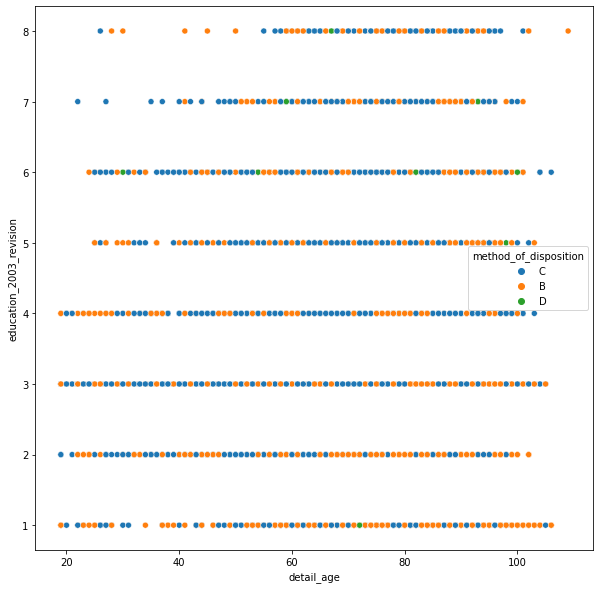

In [ ]:
#need this to resize my plot
import matplotlib.pyplot as plt

#resizing plot
f, ax = plt.subplots(figsize=(10, 10))


#scatterplot of age vs education, colored by method of burial
ax = sns.scatterplot(x=e_s["detail_age"], y=e_s["education_2003_revision"], hue=e_s['method_of_disposition'])



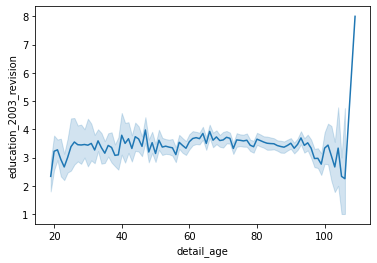

In [ ]:
#scatterplot of age vs education, colored by method of burial
sns.lineplot(x=e_s["detail_age"], y=e_s["education_2003_revision"])


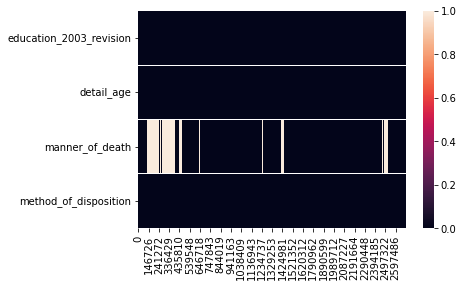

In [ ]:
#checking to see if there's missing values. The light spots are the missing values
sns.heatmap(edumort.isnull().transpose())

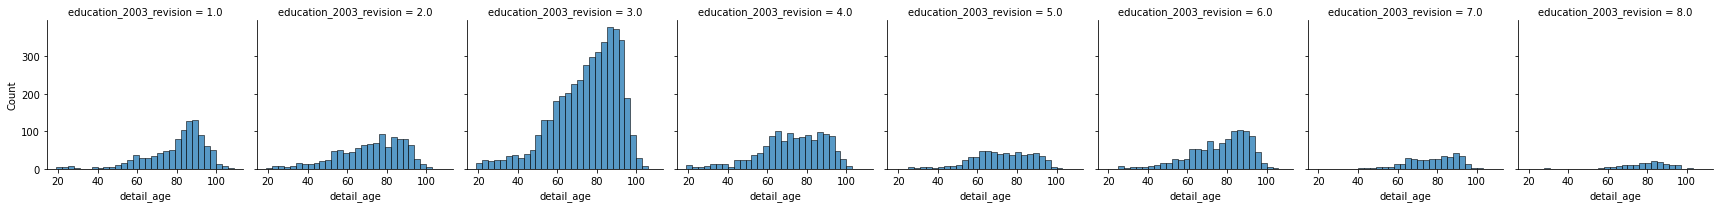

In [ ]:
sns.displot(
    e_s, x="detail_age", col="education_2003_revision",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

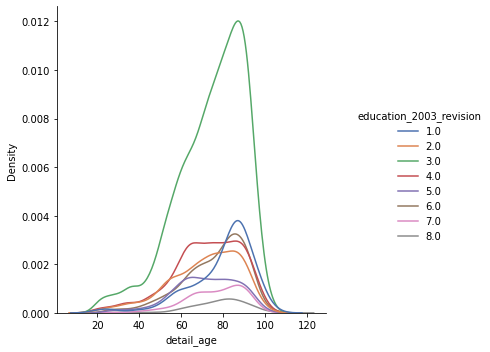

In [ ]:
#shows density within the total dataset. colors correspond to education levels

sns.displot(
    e_s, x="detail_age", facet_kws=dict(margin_titles=True),kind="kde", hue='education_2003_revision', palette="deep"
)

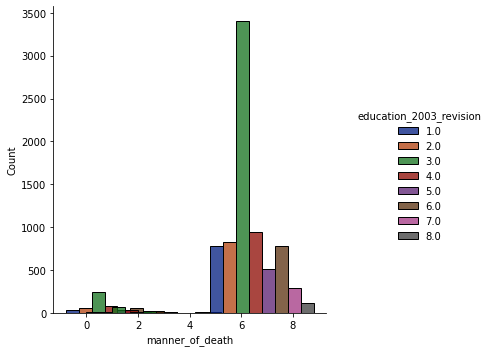

In [ ]:

sns.displot(
    e_s, x="manner_of_death", facet_kws=dict(margin_titles=True),
    hue='education_2003_revision', palette="dark", multiple="dodge", shrink=10
)

Now I'm going to start trying to do some regression

In [ ]:
#idk I probably imported these higher up but just importing what we imported in workshop 2
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#setting up education as the independent variable and age as the dependent variable
#because we want to predict age of death as a funciton of education
X=edumort['education_2003_revision']
y=edumort['detail_age']

# If an intercept isn't provided in the design matrix, make sure to add it!
X_with_intercept = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#splitting data into train and test sets, 80% in the train

X_train, X_test, y_train, y_test = train_test_split(
     X_with_intercept, y, test_size=0.2, random_state=42)

In [ ]:
# Specify the model
model = sm.OLS(y_train, X_train)

In [ ]:
# Obtain a summary report
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             detail_age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1178.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):          3.92e-258
Time:                        20:50:38   Log-Likelihood:            -8.0123e+06
No. Observations:             1899739   AIC:                         1.602e+07
Df Residuals:                 1899737   BIC:                         1.602e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     